# <center>Convolution and it's intution</center>

# Table of Content
- [1. Guassin Kernel](#1)
    - [1.1 1-D Guassian function](#1.1)
    - [1.2 ](#1.2)
    - [1.3 ](#1.3)
- <a href='#2'>2. Grayscale</a>
    - <a href='#2.1'>2.1 Inner product</a>
    - <a href='#2.2'>2.2 Convert all the rgb to gray</a>
    - <a href='#2.3'>2.3 Load data</a>
- <a href='#s3'>3. Tensorflow Basic</a>
    - <a href='#3.1'>3.1 Create a graph</a>
    - <a href='#3.2'>3.2 Run a session</a>
    - <a href='#3.3'>3.3 Interactive session</a>
    - <a href='#3.4'>3.4 Variables</a>
    - <a href='#3.5'>3.5 Placeholder</a>
     <a href='#3.6'> </a>

<a id='1'></a>
# 1. Guassian Kernel

<a id='1.1'></a>
## 1.1 1-D Guassian function
$$
f(x;\mu,\sigma) = \frac{1}{(\sigma\sqrt{2\pi})}exp(\frac{-(x-\mu)^2}{2{\mu}^2)}
$$
- $\mu$: mean
- $\sigma$: standard deviation

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

1-D gaussian

In [2]:
mean = 0.0;
sigma = 1.0;
x = tf.linspace(-3.0, 3.0, 100);
y = (1.0 / (sigma * tf.sqrt(2 * 3.1415))) * (tf.exp(tf.neg(tf.pow(x - mean, 2.0)/ (2.0 * tf.pow(sigma, 2.0)))));

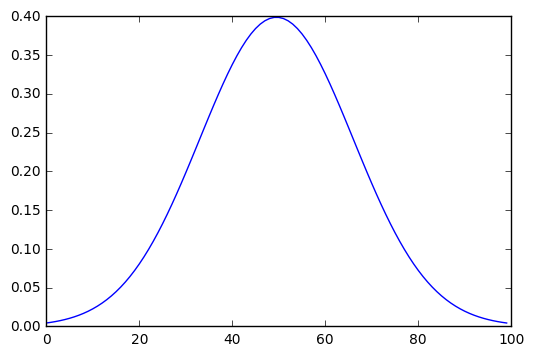

In [3]:
with tf.Session() as sess:
    result = sess.run(y);
    plt.plot(result)

<a id='1.2'></a>
## 1.2 2-D Gaussian Kernel

In [4]:
size = y.get_shape().as_list();
print size;
size = y.get_shape().as_list()[0];
print size;

[100]
100


1-D Gaussian * 1-D Gaussian to 2-D Guassian
$$
f(R^{n,1}, R^{1,n}) -> R^{n,n}
$$

In [5]:
tf.reshape(y,[1,size])

<tf.Tensor 'Reshape:0' shape=(1, 100) dtype=float32>

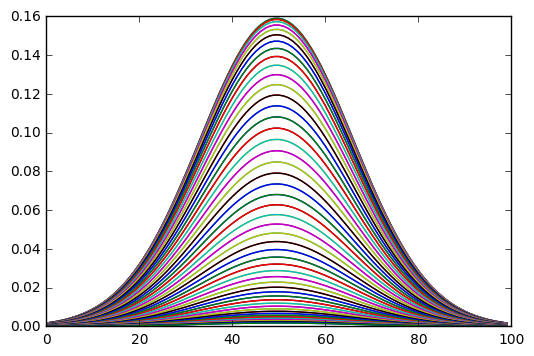

In [6]:
y_2d = tf.matmul(tf.reshape(y,[size,1]), tf.reshape(y,[1,size]));
with tf.Session() as sess:
    result = sess.run(y_2d);
    plt.plot(result);

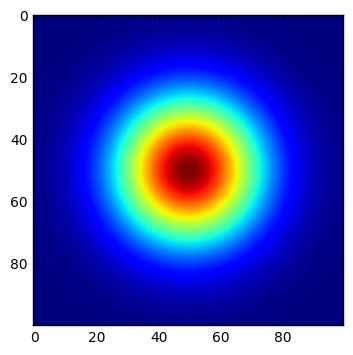

In [7]:
with tf.Session() as sess:
    result = sess.run(y_2d);
    plt.imshow(result);

<a id='2'></a>
# 2. [Image Kernels](setosa.io/ev/image-kernels/)

** The inner product of the image and kernels is the convolution image **

for example:
- image matrix is 
$$
\left(\begin{array}{cc}
1&2&3&4&5&...\\
2&3&4&5&6&...\\
3&4&5&6&7&...\\
...&...&...&...&...&...
\end{array}\right)
$$
- kernel matrix is
$$
\left(\begin{array}{cc}
1&0&1\\
0&1&0\\
1&0&1
\end{array}\right)
$$

then the 1st element M[0,0] will be:
$$
\left(\begin{array}{cc}
1&2&3\\
2&3&4\\
3&4&5
\end{array}\right)
\bullet
\left(\begin{array}{cc}
1&0&1\\
0&1&0\\
1&0&1
\end{array}\right)
=
16
$$

In [53]:
def load_data(image,path = '/home/senbo/Github/img_align_celeba/'):
    """
    image: image name
    path: path of image
    
    returns: image data
    """
    filename = path + image;
    data = plt.imread(filename);
    return data;

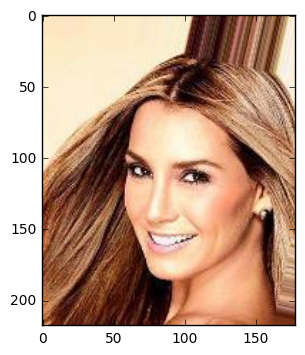

In [146]:
image = '000001.jpg';
data = load_data(image);
plt.imshow(data);

In [10]:
data.shape

(218, 178, 3)

For convolution in tensorflow the shape should be
 ```
 Number * Height * Width * Channel
 ```
 rgb image should convert to grey first so that channel = 1 or just using channel 1

- convert shape

In [11]:
data = data[:,:,0];
tf_data = data.reshape([1,data.shape[0],data.shape[1],1]);
print(tf_data.shape);

(1, 218, 178, 1)


or use tf.reshape([data], [shape]) will be the same

- dtype = uint8 wull not support by tensorflow so there use another convert method

In [12]:
image = '000001.jpg';
data = load_data(image);
img = np.ndarray(shape=(1, data.shape[0],data.shape[1],1), dtype=np.float32);
img[0,:,:,0] = data[:,:,0]; 
print (img.shape);

(1, 218, 178, 1)


In [13]:
img = tf.reshape(img, [1,data.shape[0],data.shape[1],1]);
print(img);
print(img.get_shape());
print(img.get_shape().as_list());

Tensor("Reshape_3:0", shape=(1, 218, 178, 1), dtype=float32)
(1, 218, 178, 1)
[1, 218, 178, 1]


- Image Kernel convert to the same shape(4-D)
```
Height * Width * Num of input(Channel) * Num of Output
```
- kernel matrix for instance
$$
\left(\begin{array}{cc}
8&-1&-1\\
-1&-1&-1\\
-1&-1&-1
\end{array}\right)
$$

In [14]:
height = 3;
width = 3;
num_in = 1;
num_out = 1;
kernel = np.ndarray(shape=(height, width, num_in, num_out), dtype=np.float32);
print(kernel.shape)

(3, 3, 1, 1)


In [15]:
matrix = np.array([[8,-1,-1],[-1,-1,-1],[-1,-1,-1]]);
print (matrix);

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


In [16]:
kernel[:,:,0,0] = matrix;
kernel = tf.reshape(kernel, [kernel.shape[0],kernel.shape[1],1,1]);
print (kernel);

Tensor("Reshape_4:0", shape=(3, 3, 1, 1), dtype=float32)


- convolution

In [17]:
print kernel
print img

Tensor("Reshape_4:0", shape=(3, 3, 1, 1), dtype=float32)
Tensor("Reshape_3:0", shape=(1, 218, 178, 1), dtype=float32)


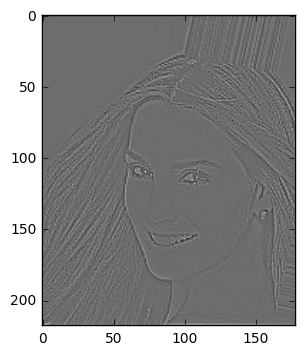

In [18]:
conv = tf.nn.conv2d(img, kernel, strides=[1,1,1,1], padding='SAME')
with tf.Session() as sess:
    result = sess.run(conv);
    plt.imshow(np.squeeze(result), cmap='gray');

<a id ='2.1'></a>
## 2.1 Using Gaussian kernel

In [19]:
gaussian_kernel = tf.reshape(y_2d,[size,size,1,1]);
print(gaussian_kernel.get_shape().as_list());

[100, 100, 1, 1]


(1, 218, 178, 1)


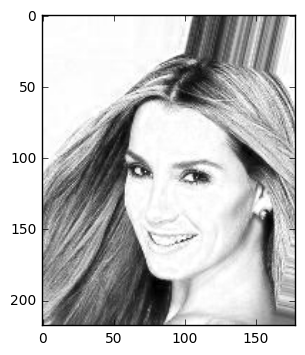

In [20]:
print(img.get_shape());
with tf.Session() as sess:
    res = sess.run(img);
    plt.imshow(res[0,:,:,0], cmap='gray');

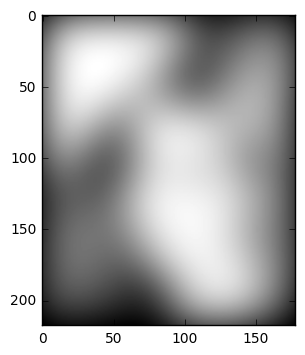

In [21]:
conv = tf.nn.conv2d(img, gaussian_kernel, strides=[1,1,1,1], padding='SAME');
with tf.Session() as sess:
    result = sess.run(conv);
    plt.imshow(np.squeeze(result), cmap='gray');

<a id='2.2'></a>
## 2.2 Gabor Kernel

$$
g(x,y,\lambda,\theta,\psi,\sigma,\gamma) = exp(-\frac{x^{'2}+\gamma^2y^{'2}}{2\sigma^2})exp(2\pi\frac{x'}{\lambda}+\psi)
$$
where:  
$
x' = xcos\theta + ysin\theta
$  
$
y' = -xsin\theta + ycos\theta
$

In [22]:
sess = tf.InteractiveSession();

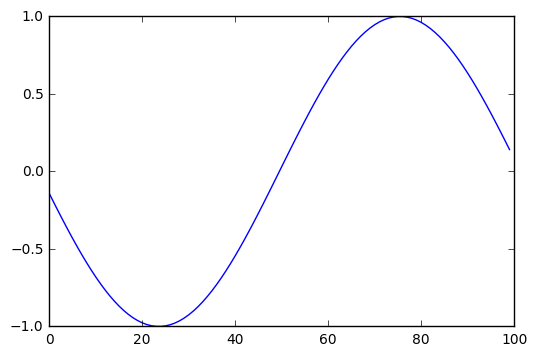

In [23]:
xs = tf.linspace(-3.0, 3.0, size);
ys = tf.sin(xs);
plt.plot(ys.eval());

In [24]:
print(ys.get_shape());
ys = tf.reshape(ys, [size, 1]);
print(ys.get_shape());

(100,)
(100, 1)


In [25]:
ones = tf.ones((1,size));
print ones.get_shape();

(1, 100)


(100, 100)


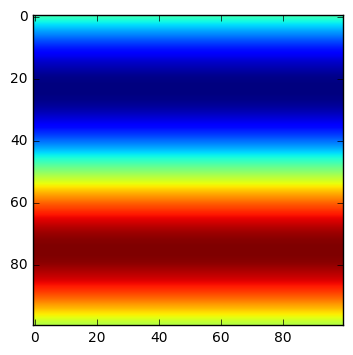

In [26]:
wave = tf.matmul(ys, ones);
print wave.get_shape();
plt.imshow(wave.eval());

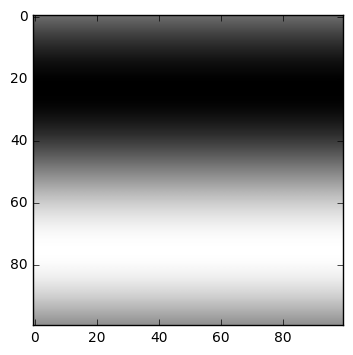

In [27]:
plt.imshow(wave.eval(), cmap='gray');

- gabor 
$$
sin_{matrix} * guass_{matrix}
$$

(100, 100)


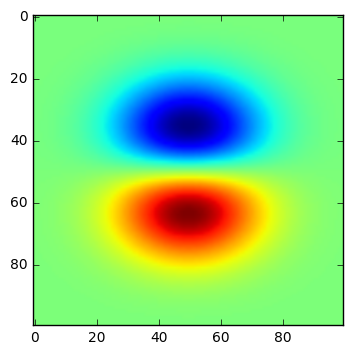

In [130]:
gabor = tf.mul(wave, y_2d);
plt.imshow(gabor.eval());
print (gabor.get_shape());

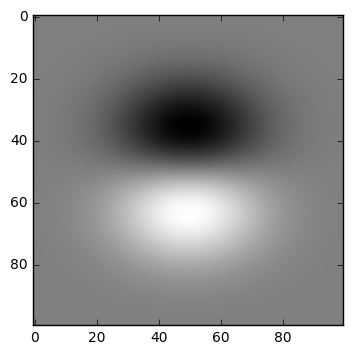

In [29]:
plt.imshow(gabor.eval(), cmap='gray');

<a id='2.3'></a>
## 2.3 Using Tensorflow `placeholder' rewrite convolution

In [30]:
img_2d = tf.placeholder(tf.float32, shape=[None, None], name='img');
print (img_2d);

Tensor("img:0", shape=(?, ?), dtype=float32)


- reshape img_2d to img_3d

In [31]:
img_3d = tf.expand_dims(img_2d,0);
print (img_3d.get_shape());
print (img_3d)

(1, ?, ?)
Tensor("ExpandDims:0", shape=(1, ?, ?), dtype=float32)


In [32]:
img_3d = tf.expand_dims(img_2d,1);
print (img_3d.get_shape());

(?, 1, ?)


In [33]:
img_3d = tf.expand_dims(img_2d,2);
print (img_3d.get_shape());

(?, ?, 1)


- reshape img to img_4d

** Image data shape should be this: **
```
Num * Height * Width * Ch 
```

In [34]:
img_4d = tf.expand_dims(img_3d, 0);
print (img_4d.get_shape());
print (img_4d.get_shape().as_list());

(1, ?, ?, 1)
[1, None, None, 1]


In [35]:
img_4d = tf.placeholder(tf.float32, shape=[1,None,None,1], name="img_4d");
print(img_4d);

Tensor("img_4d:0", shape=(1, ?, ?, 1), dtype=float32)


In [36]:
kernel_4d = tf.placeholder(tf.float32, shape=[None,None,1,1], name="kernel_4d");

- one line too long change line case

In [37]:
pi = 3.1415;
area = (pi**2 *
        3);
print(area)

29.60706675


In [46]:
print data.shape;
print type(data);

(218, 178, 3)
<type 'numpy.ndarray'>


<a id='F1'></a>
- **Func : `2d image to 4d shape`**

In [150]:
def img4d(img):
    '''
    img: 3d img
    
    returns: 4d shape[n,h,w,c] data as float32 
    '''
    img = img.astype(np.float32);
    img_4d = np.ndarray(shape=(1,img.shape[0],img.shape[1],1), dtype=np.float32);
    if len(img.shape) == 3:
        img_4d[0,:,:,0] = img[:,:,0];
    else:
        img_4d[0,:,:,0] = img;
    
    return img_4d;

In [147]:
img_4d = img4d(data);
print (img_4d.shape);

(1, 218, 178, 1)


<a id='f2'></a>
- **Func: 2d kernel to 4d shape**

In [50]:
def kernel4d(kernel):
    """
    kernel: 2d matrix
    
    returns: 4d shape[h,w,i,o] data as float32
    """
    kernel = kernel.astype(np.float32);
    kernel_4d = np.ndarray(shape=(kernel.shape[0], kernel.shape[1], 1, 1), dtype=np.float32);
    kernel_4d[:,:,0,0] = kernel;
    
    return kernel_4d;

In [51]:
k = np.array([[-1.0,-1.0,-1.0],[-1.0,7.0,-1.0],[-1.0,-1.0,-1.0]]);
k4d = kernel4d(k);
print (k4d.shape);

(3, 3, 1, 1)


In [92]:
def conv_4d(img, kernel):
    """
    img: 2-d image with type np array
    kernel: 2-d kernel with type np array
    
    returns: convolution image
    """
    img = img4d(img);
    kernel = kernel4d(kernel);
    img_4d = tf.placeholder(tf.float32, shape=[1,None,None,1], name="img_4d");
    kernel_4d = tf.placeholder(tf.float32, shape=[None,None,1,1], name="kernel_4d");
    conv = tf.nn.conv2d(img_4d, kernel_4d,strides=[1,1,1,1], padding="SAME");
    with tf.Session() as sess:
        conv = sess.run(conv,
                       feed_dict = {img_4d: img,
                                   kernel_4d: kernel})
        conv_img = conv[0,:,:,0];
        plt.imshow(conv_img, cmap='gray');
        return conv_img;

(1108, 1680, 3)


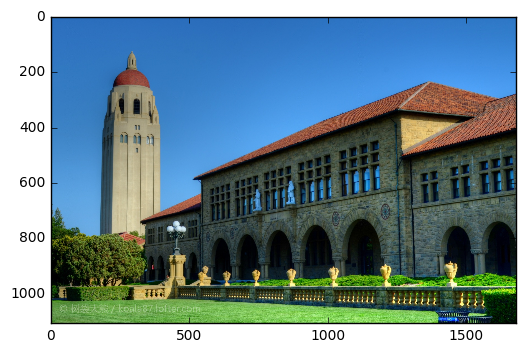

In [97]:
data = load_data('test.jpg','/home/senbo/Pictures/');
print (data.shape);
plt.imshow(data);

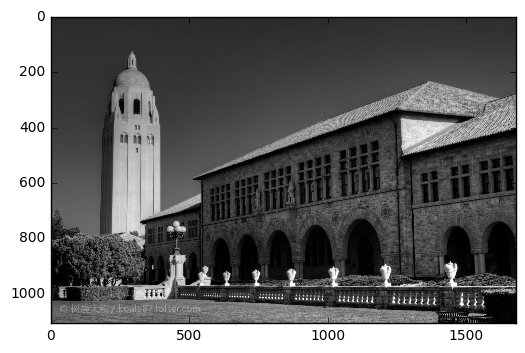

In [98]:
plt.imshow(data[:,:,0], cmap='gray');

- when 
$$
kernel =
\left(\begin{array}{cc}
1&0&0\\
0&0&0\\
0&0&0
\end{array}\right)
$$
image will not change

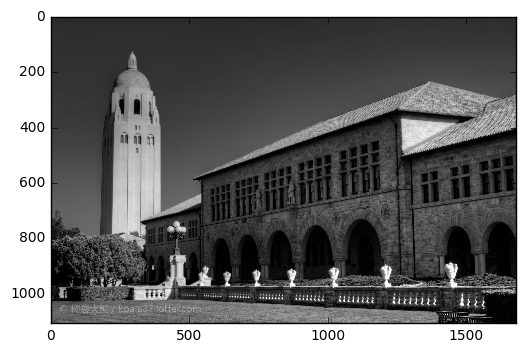

In [106]:
k = np.array([[1,0,0],[0,0,0],[0,0,0]]);
conv_img = conv_4d(data, k);

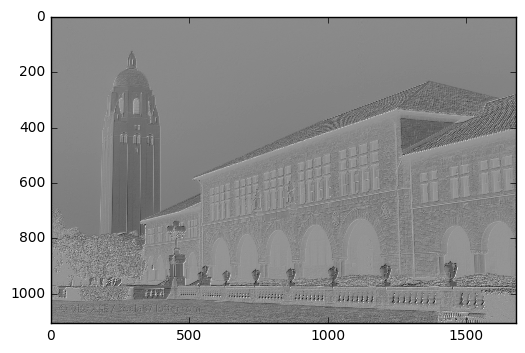

In [121]:
k = np.array([[6.0,-1.0,-1.0],[-1.0,-1.0,-1.0],[-1.0,-1.0,-1.0]]);
conv_img = conv_4d(data, k);

In [108]:
data.shape

(1108, 1680, 3)

</a id='f_tf_conv'></a>
- **Another Func convolution of image and filter(kernel) ** <font color='red'>ERROR!</font>

In [122]:
def tf_conv_4d(img, kernel):
    """
    img: 2-d image
    kernel: 2-d kernel
    
    returns: convolution image
    """
    img = tf.reshape(img, [1,img.shape[0],img.shape[1],img.shape[2]]);
    kernel = tf.reshape(kernel, [kernel.shape[0],kernel.shape[1],1,1]);
    img_4d = tf.placeholder(tf.float32, shape=[1,None,None,None], name="img_4d");
    kernel_4d = tf.placeholder(tf.float32, shape=[None,None,1,1], name="kernel_4d");
    conv = tf.nn.conv2d(img_4d, kernel_4d,strides=[1,1,1,1], padding="SAME");
    with tf.Session() as sess:
        conv = sess.run(conv,
                       feed_dict = {img_4d: img,
                                   kernel_4d: kernel})
        conv_img = conv[0,:,:,0];
        plt.imshow(conv_img, cmap='gray');
        return conv_img;

In [123]:
k = np.array([[7,-1,-1],[-1,-1,-1],[-1,-1,-1]]);
conv_img = tf_conv_4d(data, k);

TypeError: The value of a feed cannot be a tf.Tensor object. Acceptable feed values include Python scalars, strings, lists, or numpy ndarrays.

<a id='3'></a>
# 3. Using 'scikit-image' data as an exmaple

In [124]:
from skimage import data
print(data);

<module 'skimage.data' from '/usr/local/lib/python2.7/dist-packages/skimage/data/__init__.pyc'>


In [125]:
print(data.camera());
print(data.camera().shape);

[[156 157 160 ..., 152 152 152]
 [156 157 159 ..., 152 152 152]
 [158 157 156 ..., 152 152 152]
 ..., 
 [121 123 126 ..., 121 113 111]
 [121 123 126 ..., 121 113 111]
 [121 123 126 ..., 121 113 111]]
(512, 512)


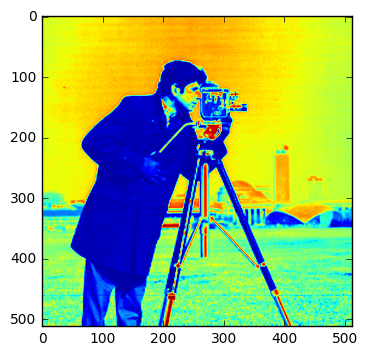

In [140]:
plt.imshow(data.camera());

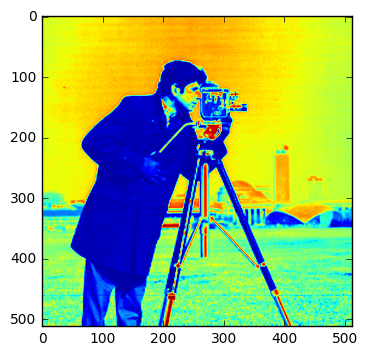

In [141]:
img = data.camera().astype(np.float32);
plt.imshow(img);

(512, 512)


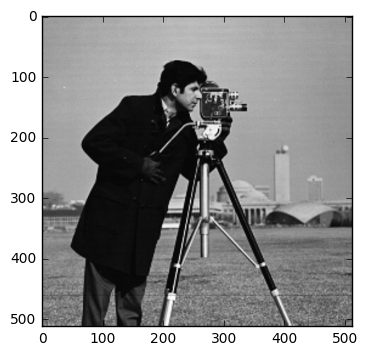

In [142]:
print(img.shape);
plt.imshow(img, cmap='gray');

- Gabor Kernel

In [137]:
gabor = gabor.eval();
print gabor.astype(np.float32);

[[ -2.77185904e-06  -3.31845558e-06  -3.95827374e-06 ...,  -3.95827374e-06
   -3.31845558e-06  -2.77185904e-06]
 [ -4.72239572e-06  -5.65362780e-06  -6.74368175e-06 ...,  -6.74368175e-06
   -5.65362780e-06  -4.72239572e-06]
 [ -7.28684654e-06  -8.72377586e-06  -1.04057726e-05 ...,  -1.04057726e-05
   -8.72377586e-06  -7.28684654e-06]
 ..., 
 [  7.28684654e-06   8.72377586e-06   1.04057726e-05 ...,   1.04057726e-05
    8.72377586e-06   7.28684654e-06]
 [  4.72239572e-06   5.65362780e-06   6.74368175e-06 ...,   6.74368175e-06
    5.65362780e-06   4.72239572e-06]
 [  2.77185904e-06   3.31845558e-06   3.95827374e-06 ...,   3.95827374e-06
    3.31845558e-06   2.77185904e-06]]


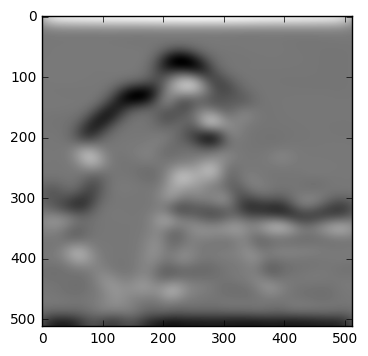

In [151]:
conv_img = conv_4d(img, gabor);